In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import hvplot.pandas

In [65]:
df = pd.read_csv('http://crowding.data.tfl.gov.uk/Network%20Demand/StationFootfall_2022.csv')

In [66]:
print(df.head())

   TravelDate DayOFWeek          Station  EntryTapCount  ExitTapCount
0    20220101  Saturday   Abbey Road DLR            246           213
1    20220101  Saturday       Abbey Wood           1449          1332
2    20220101  Saturday    Acton Central            568           495
3    20220101  Saturday  Acton Main Line            204           184
4    20220101  Saturday       Acton Town           2165          2485


In [67]:
df['TravelDate']= pd.to_datetime(df['TravelDate'], format='%Y%m%d')
print(df.head())



  TravelDate DayOFWeek          Station  EntryTapCount  ExitTapCount
0 2022-01-01  Saturday   Abbey Road DLR            246           213
1 2022-01-01  Saturday       Abbey Wood           1449          1332
2 2022-01-01  Saturday    Acton Central            568           495
3 2022-01-01  Saturday  Acton Main Line            204           184
4 2022-01-01  Saturday       Acton Town           2165          2485


In [68]:
#2a
weekend=df[df['DayOFWeek'].isin(['Saturday', 'Sunday'])]
feb_to_may= weekend[(weekend['TravelDate'].dt.month >= 2) & (weekend['TravelDate'].dt.month <= 5)]
total_entering_passengers = feb_to_may['EntryTapCount'].sum()
print(total_entering_passengers)


83238494


In [69]:
#2b
july_to_dec= df[(df['TravelDate'].dt.month >= 7) & (df['TravelDate'].dt.month <= 12)]
station_exiting_sum = july_to_dec.groupby('Station')['ExitTapCount'].sum()
stations = station_exiting_sum.nlargest(5)
print(stations)


Station
Kings Cross St Pancras    17462790
Victoria                  14776608
Oxford Circus             14517241
Liverpool Street          13768597
Waterloo                  13532781
Name: ExitTapCount, dtype: int64


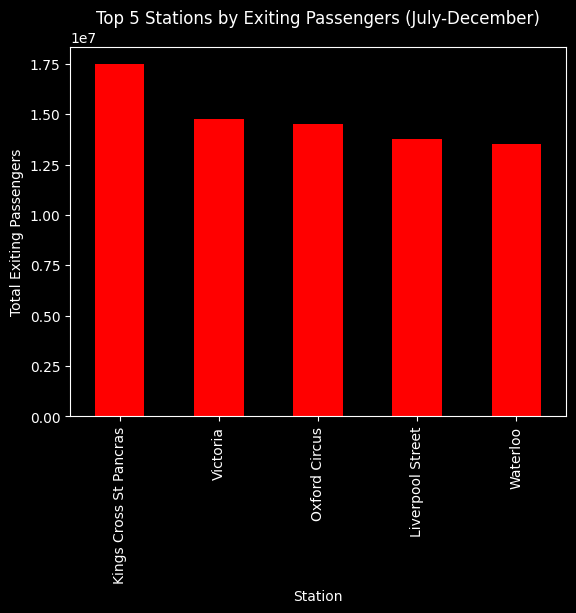

In [70]:
# Plotting the results
stations.plot(kind='bar', color='red', title='Top 5 Stations by Exiting Passengers (July-December)')
plt.xlabel('Station')
plt.ylabel('Total Exiting Passengers')
plt.show()

In [71]:
#2c
annual_exiting_vol = df.groupby('Station')['ExitTapCount'].sum()

# Calculate the 20% and 80% percentiles
percentile20 = annual_exiting_vol.quantile(0.20)
percentile80 = annual_exiting_vol.quantile(0.80)

print(f'20th percentile: {percentile20}')
print(f'80th percentile: {percentile80}')

20th percentile: 567924.6000000001
80th percentile: 3285413.400000002


/var/folders/k_/56n9wl_j531_w664x6r2v8l00000gn/T/ipykernel_53147/1192661904.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  august_to_october= station[(station['TravelDate'].dt.month >= 8) & (df['TravelDate'].dt.month <= 10)]


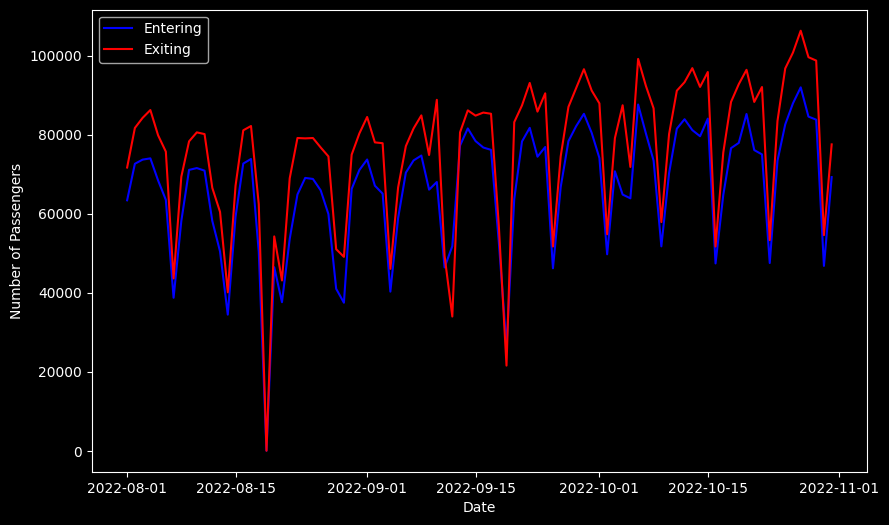

In [72]:
#2d
station= df[df.Station=='Oxford Circus']
august_to_october= station[(station['TravelDate'].dt.month >= 8) & (df['TravelDate'].dt.month <= 10)]
plt.figure(figsize=(10, 6))
plt.plot(august_to_october['TravelDate'],august_to_october['EntryTapCount'], label='Entering', color='blue')
plt.plot(august_to_october['TravelDate'],august_to_october['ExitTapCount'], label='Exiting', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [73]:

plt.style.use('dark_background')
pn.extension(sizing_mode="stretch_width", theme='dark')

#sliders
station_selector = pn.widgets.Select(name='Station', options=df['Station'].unique().tolist(), width=200, height=40)
month_slider = pn.widgets.IntRangeSlider(
    name='Month Range',
    start=1,
    end=12,
    value=(7, 12),
    bar_color='#FF4500', width=400, height=40
)


In [74]:
def plot_station_data(station):
    filtered_df = df[df['Station'] == station]
    return filtered_df.hvplot.line(x='TravelDate', y='EntryTapCount', color='green', label='Entries').opts(height=300) * filtered_df.hvplot.line(x='TravelDate', y='ExitTapCount', color='red', label='Exits')

# Plotting function for top 5 stations
def plot_top_5_stations(month_range):
    start_month, end_month = month_range
    filtered_df = df[(df['TravelDate'].dt.month >= start_month) & (df['TravelDate'].dt.month <= end_month)]
    station_exit_sums = filtered_df.groupby('Station')['ExitTapCount'].sum()
    top_5_stations = station_exit_sums.nlargest(5)
    
    # Plotting with Matplotlib
    fig, ax = plt.subplots(facecolor='#333333')
    top_5_stations.plot(kind='bar', color='#FF4500', title='Top 5 Stations by Exiting Passengers (Selected Months)', ax=ax)
    ax.set_xlabel('Station')
    ax.set_ylabel('Total Exiting Passengers')
    ax.set_facecolor('#333333')
    ax.tick_params(colors='white')
    ax.title.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    plt.close(fig)  # Close the figure to prevent it from displaying immediately
    return fig

# Plotting function for maximum exiting passengers on weekends
def plot_max_weekend_exit(month_range):
    start_month, end_month = month_range
    filtered_df = df[(df['TravelDate'].dt.month >= start_month) & (df['TravelDate'].dt.month <= end_month) & (df['TravelDate'].dt.weekday >= 5)]
    max_exits = filtered_df.groupby('Station')['ExitTapCount'].max().nlargest(5)
    
    # Plotting with Matplotlib
    fig, ax = plt.subplots(facecolor='#333333')
    max_exits.plot(kind='bar', color='#00FF00', title='Max Exiting Passengers on Weekends (Selected Months)', ax=ax)
    ax.set_xlabel('Station')
    ax.set_ylabel('Max Exiting Passengers')
    ax.set_facecolor('#333333')
    ax.tick_params(colors='white')
    ax.title.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    plt.close(fig)  # Close the figure to prevent it from displaying immediately
    return fig

In [75]:
# Bind plot to widgets
interactive_plot = pn.bind(plot_station_data, station=station_selector)
top_5_plot = pn.bind(plot_top_5_stations, month_range=month_slider)
weekend_max_plot = pn.bind(plot_max_weekend_exit, month_range=month_slider)

dashboard = pn.Column(
    pn.pane.Markdown("## **London Underground Passenger Flow Dashboard**"),
    pn.Row(station_selector),
    pn.Row(interactive_plot),
    pn.Row(month_slider),
    pn.Row(top_5_plot, weekend_max_plot)  # Add both top 5 and weekend max plots in one row
)

dashboard.show() 

Launching server at http://localhost:58951
